In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DIR_PATH = '/content/drive/MyDrive/flowers'

In [ ]:


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
import itertools

import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
import torch.nn.functional as F
import warnings
warnings.filterwarnings('ignore')


In [ ]:


mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

transformations = {
    'train': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.CenterCrop((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ]),
    'test': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.CenterCrop((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ])
}
     


In [ ]:
learning_rate = 0.01
batch_size = 64
num_epochs = 50
num_classes = 5

# device
device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print(device)

cuda


In [ ]:
total_dataset = torchvision.datasets.ImageFolder(DIR_PATH,transform=transformations['train'])

len(total_dataset),total_dataset[0][0].shape,total_dataset.class_to_idx

(4317,
 torch.Size([3, 224, 224]),
 {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4})

In [ ]:
SPLIT_SIZE = 0.8
tot_len = len(total_dataset)

train_size = int(SPLIT_SIZE * tot_len)
val_size = tot_len - train_size

print(f'Training set size = {train_size} \nValidation set size = {val_size}')

train_dataset, val_dataset =  torch.utils.data.random_split(total_dataset,[train_size,val_size])

len(train_dataset),len(val_dataset)

Training set size = 3453 
Validation set size = 864


(3453, 864)

In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                         batch_size=batch_size,
                         shuffle=True,
                         num_workers=4)

val_loader = DataLoader(dataset=val_dataset,
                       batch_size=1,
                       shuffle=True,
                       num_workers=4)

In [ ]:
class Net(nn.Module):
    def __init__(self,model,num_classes):
        super(Net,self).__init__()
        self.base_model = nn.Sequential(model) 
        self.linear1 = nn.Linear(in_features=1000,out_features=128)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(in_features=128,out_features=num_classes)
    
    def forward(self,x):
        x = self.base_model(x)
        x = torch.flatten(x,1)
        lin = self.linear1(x)
        x = self.relu(lin)
        out = self.linear2(x)
        return lin, out

In [ ]:


model = torchvision.models.alexnet(pretrained=True) # base model

model = Net(model,num_classes)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.9)
     


In [ ]:

print(model)

Net(
  (base_model): Sequential(
    (0): AlexNet(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
        (1): ReLU(inplace=True)
        (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
        (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (4): ReLU(inplace=True)
        (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
        (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (7): ReLU(inplace=True)
        (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (9): ReLU(inplace=True)
        (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): ReLU(inplace=True)
        (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
      (classifier): Sequen

In [ ]:
n_iters = len(train_loader)
running_loss = 0.0
loss_values = []
running_corrects = []
epoch_acc = []
acc_values = []
for epoch in range(num_epochs):
    model.train()
    n_samples = 0.0
    n_correct = 0.0
    for ii,(images,labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        _,outputs = model(images)
      
    
        loss = criterion(outputs,labels)
        
        # free_gpu_cache()
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if (ii+1)%54 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{ii+1}/{n_iters}], Loss = {loss.item():.6f}')
            
    print('----------------------------------------')
     
    _,preds = torch.max(outputs,1)
    n_samples += labels.size(0)
    n_correct += (preds == labels).sum().item()
    acc_values.append(n_correct/labels.size(0))
    running_loss =+ loss.item() * images.size(0)
    loss_values.append(running_loss / len(train_loader))

Epoch [1/50], Step [54/54], Loss = 0.490079
----------------------------------------
Epoch [2/50], Step [54/54], Loss = 0.455496
----------------------------------------
Epoch [3/50], Step [54/54], Loss = 0.321481
----------------------------------------
Epoch [4/50], Step [54/54], Loss = 0.343662
----------------------------------------
Epoch [5/50], Step [54/54], Loss = 0.151752
----------------------------------------
Epoch [6/50], Step [54/54], Loss = 0.324045
----------------------------------------
Epoch [7/50], Step [54/54], Loss = 0.368769
----------------------------------------
Epoch [8/50], Step [54/54], Loss = 0.114469
----------------------------------------
Epoch [9/50], Step [54/54], Loss = 0.110163
----------------------------------------
Epoch [10/50], Step [54/54], Loss = 0.072462
----------------------------------------
Epoch [11/50], Step [54/54], Loss = 0.058607
----------------------------------------
Epoch [12/50], Step [54/54], Loss = 0.160319
------------------

Text(0, 0.5, 'loss')

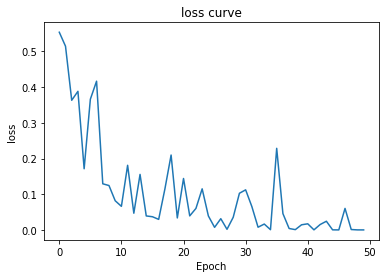

In [ ]:
plt.plot(loss_values)
plt.title('loss curve')
plt.xlabel('Epoch')
plt.ylabel('loss')

Text(0, 0.5, 'acc')

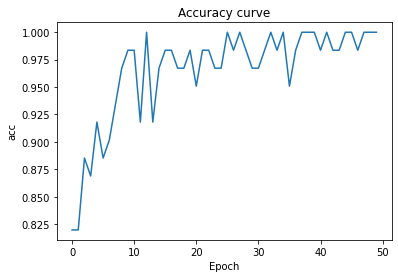

In [ ]:
plt.plot(acc_values)
plt.title('Accuracy curve')
plt.xlabel('Epoch')
plt.ylabel('acc')

In [ ]:




# evaluating model and getting features of every image

def eval_model_extract_features(features,true_labels,model,dataloader,phase):

    with torch.no_grad():
        # for entire dataset
        n_correct = 0
        n_samples = 0

        model.eval()

        for images,labels in dataloader:

            images = images.to(device)
            labels = labels.to(device)

            true_labels.append(labels)
            
            ftrs,outputs = model(images)
            features.append(ftrs)

            _,preds = torch.max(outputs,1)
            predss.append(outputs)
            n_samples += labels.size(0)
            n_correct += (preds == labels).sum().item()
                
        accuracy = n_correct/float(n_samples)

        print(f'Accuracy of model on {phase} set = {(100.0 * accuracy):.4f} %')

    return features,predss,true_labels

features = []   
predss = []
true_labels = []

In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                         batch_size=1,
                         shuffle=True,
                         num_workers=4)

features,predss,true_labels = eval_model_extract_features(features,true_labels,model,dataloader=train_loader,phase='training')


Accuracy of model on training set = 99.9131 %


In [ ]:


features,predss,true_labels = eval_model_extract_features(features,true_labels,model,dataloader=val_loader,phase='validation')

print(len(features),len(true_labels))
     


Accuracy of model on validation set = 87.7315 %
4317 4317


In [ ]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix of flower images classifier',
                          cmap=plt.cm.RdPu):

    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(6)
    plt.xticks(tick_marks, rotation=90)
    plt.yticks(tick_marks)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
true_labelss = []
for i in range(len(true_labels)):
  true_labelss.append(true_labels[i].cpu().numpy()[0])
predsss = []
for i in range(len(predss)):
  predsss.append(predss[i].cpu().numpy()[0])

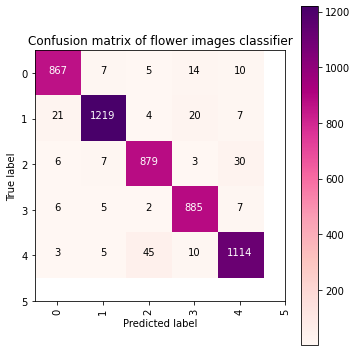

In [ ]:
confusionMatrix = confusion_matrix(true_labelss, predsss)
plot_confusion_matrix(confusionMatrix)

In [ ]:
print(classification_report(true_labelss, predsss))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       903
           1       0.98      0.96      0.97      1271
           2       0.94      0.95      0.95       925
           3       0.95      0.98      0.96       905
           4       0.95      0.95      0.95      1177

    accuracy                           0.96      5181
   macro avg       0.96      0.96      0.96      5181
weighted avg       0.96      0.96      0.96      5181

